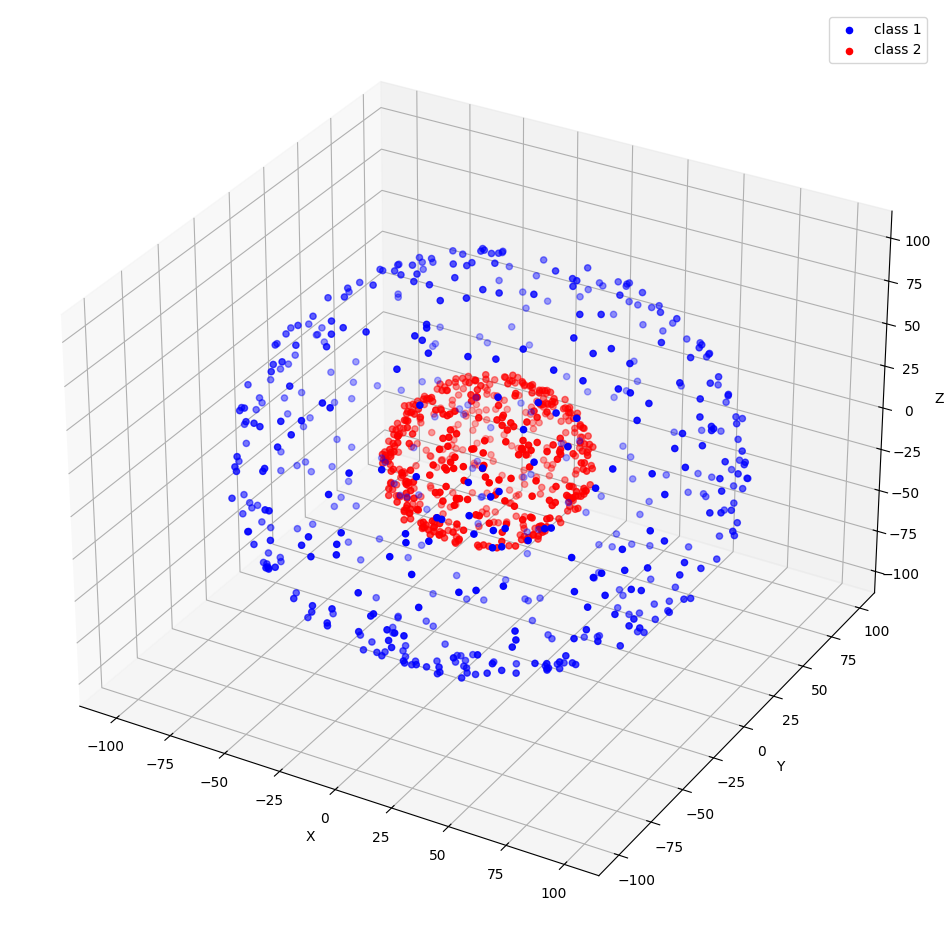

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generatePointsOnSphere(r, num_points, std_dev):
    phi_1 = np.random.uniform(0, 2*np.pi, num_points)
    theta_1 = np.arccos(np.random.uniform(-1, 1, num_points))
    x = r * np.sin(theta_1) * np.cos(phi_1)
    y = r * np.sin(theta_1) * np.sin(phi_1)
    z = r * np.cos(theta_1)

    x_p = x + np.random.normal(0, std_dev, size=len(x))
    y_p = y + np.random.normal(0, std_dev, size=len(y))
    z_p = z + np.random.normal(0, std_dev, size=len(z))
    
    return x_p, y_p, z_p


num_points = 500
std_dev = 1

r_1 = 100
x_1, y_1, z_1 = generatePointsOnSphere(r_1, num_points, std_dev)

r_2 = 40
x_2, y_2, z_2 = generatePointsOnSphere(r_2, num_points, std_dev)

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_1, y_1, z_1, color='blue', label='class 1')
ax.scatter(x_2, y_2, z_2, color='red', label='class 2')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

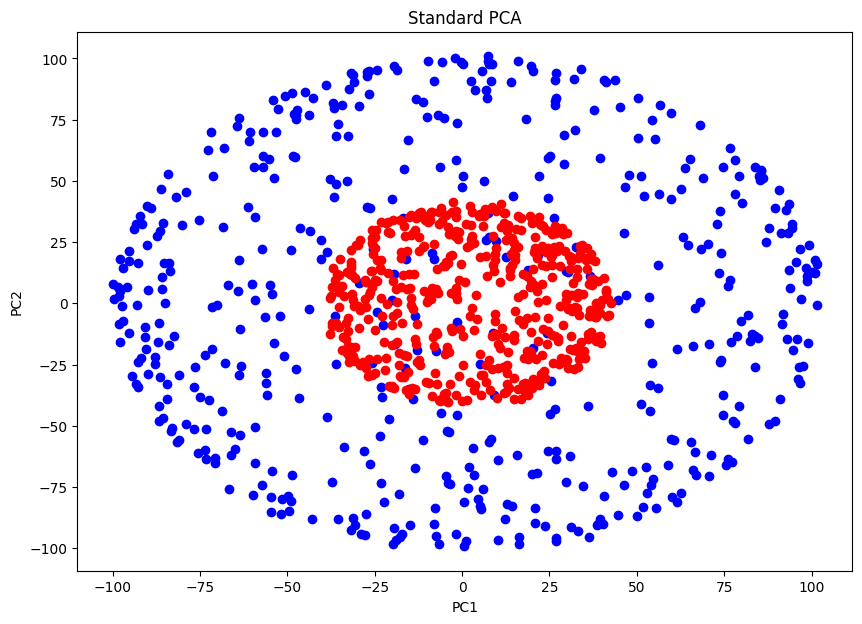

In [78]:
from sklearn.decomposition import PCA

X = np.array([np.concatenate((x_1, x_2)), np.concatenate((y_1, y_2)), np.concatenate((z_1, z_2))]).T

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:500, 0], X_pca[:500, 1], color='blue', label='class 1')
plt.scatter(X_pca[-500:, 0], X_pca[-500:, 1], color='red', label='class 2')
plt.title('Standard PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

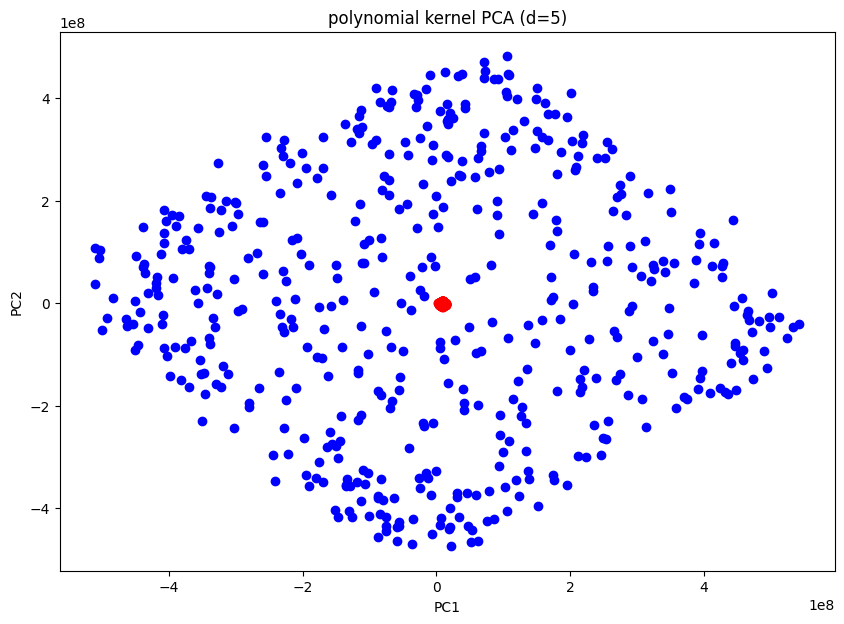

In [70]:
from sklearn.decomposition import KernelPCA

X = np.array([np.concatenate((x_1, x_2)), np.concatenate((y_1, y_2)), np.concatenate((z_1, z_2))]).T

kpca = KernelPCA(n_components=2, kernel='poly', degree=5)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_kpca[:500, 0], X_kpca[:500, 1], color='blue', label='class 1')
plt.scatter(X_kpca[-500:, 0], X_kpca[-500:, 1], color='red', label='class 2')
plt.title('polynomial kernel PCA (d=5)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

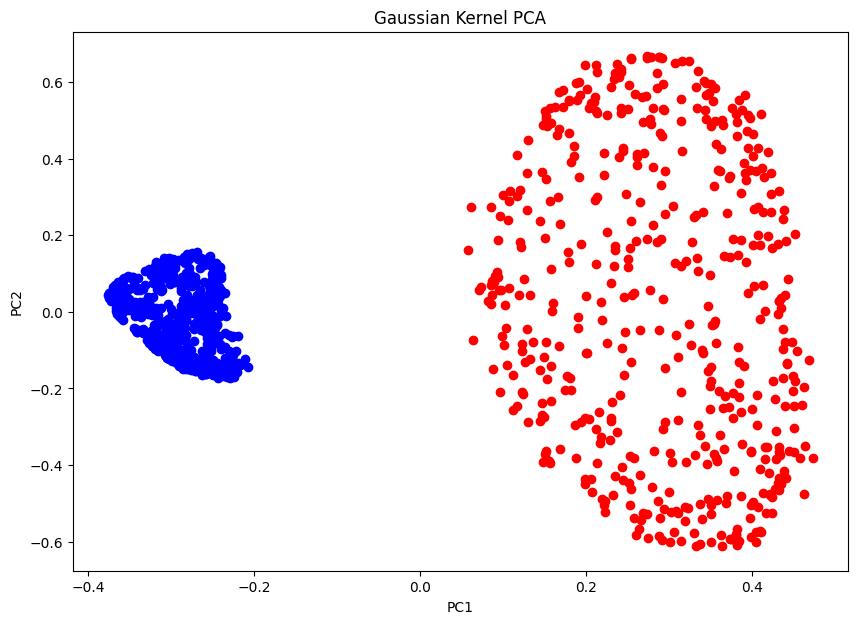

In [77]:
sigma = 35
gamma = 1.0 / (2 * sigma**2)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_kpca[:500, 0], X_kpca[:500, 1], color='blue', label='class 1')
plt.scatter(X_kpca[-500:, 0], X_kpca[-500:, 1], color='red', label='class 2')
plt.title('Gaussian Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()